In [1]:
import pandas as pd
df = pd.read_csv('marketing_data.csv')
print("Columns in DataFrame:", df.columns.tolist())
df.columns = df.columns.str.strip()
print("Columns in DataFrame:", df.columns.tolist())


Columns in DataFrame: ['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain', 'Country']
Columns in DataFrame: ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain', 'Country']


In [2]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Income'].describe()

count           2216
unique          1974
top       $7,500.00 
freq              12
Name: Income, dtype: object

In [3]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [4]:
df['Income'] = df['Income'].str.replace('[\$,]', '', regex=True).astype(float)
df['Income'] = df.groupby(['Education', 'Marital_Status'])['Income'].transform(lambda x: x.fillna(x.mean()))

In [5]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

In [6]:
df['Education'] = df['Education'].str.capitalize().str.strip()
df['Marital_Status'] = df['Marital_Status'].str.capitalize().str.strip()

print("\nUnique values in 'Education' after cleaning:", df['Education'])
print("Unique values in 'Marital_Status' after cleaning:", df['Marital_Status'])


Unique values in 'Education' after cleaning: 0       Graduation
1       Graduation
2       Graduation
3       Graduation
4       Graduation
           ...    
2235           Phd
2236      2n cycle
2237    Graduation
2238    Graduation
2239           Phd
Name: Education, Length: 2240, dtype: object
Unique values in 'Marital_Status' after cleaning: 0       Divorced
1         Single
2        Married
3       Together
4         Single
          ...   
2235    Divorced
2236     Married
2237    Divorced
2238     Married
2239     Married
Name: Marital_Status, Length: 2240, dtype: object


In [7]:
df['Total_Children'] = df['Kidhome'] + df['Teenhome']
df[['Kidhome', 'Teenhome', 'Total_Children']]

,Kidhome,Teenhome,Total_Children
0,0,0,0
1,0,0,0
2,0,1,1
3,1,1,2
4,1,0,1
...,...,...,...
2235,0,1,1
2236,1,0,1
2237,1,0,1
2238,0,0,0


In [8]:
df['Age'] = 2024 - df['Year_Birth']
print(df[['Year_Birth', 'Age']])

      Year_Birth  Age
0           1970   54
1           1961   63
2           1958   66
3           1967   57
4           1989   35
...          ...  ...
2235        1976   48
2236        1977   47
2237        1976   48
2238        1978   46
2239        1969   55

[2240 rows x 2 columns]


In [9]:
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Spending'] = df[product_cols].sum(axis=1)
print(df['Total_Spending'])

0       1190
1        577
2        251
3         11
4         91
        ... 
2235     689
2236      55
2237     309
2238    1383
2239    1078
Name: Total_Spending, Length: 2240, dtype: int64


In [10]:
df['Total_Purchases'] = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
print(df['Total_Purchases'])

0       15
1       18
2       11
3        4
4        8
        ..
2235    20
2236     5
2237    14
2238    20
2239    18
Name: Total_Purchases, Length: 2240, dtype: int64


In [11]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# sns.boxplot(data=df, y='Income')
# plt.hist(df['Income'], bins=5)
# plt.show()

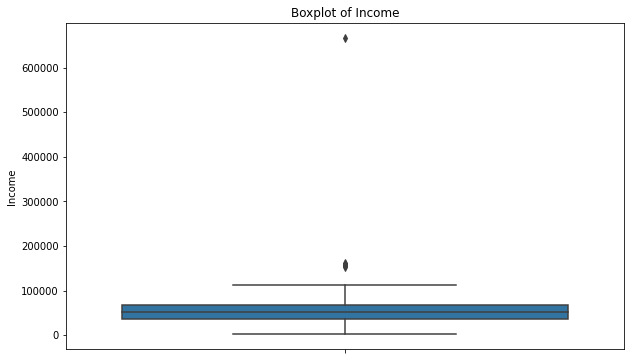

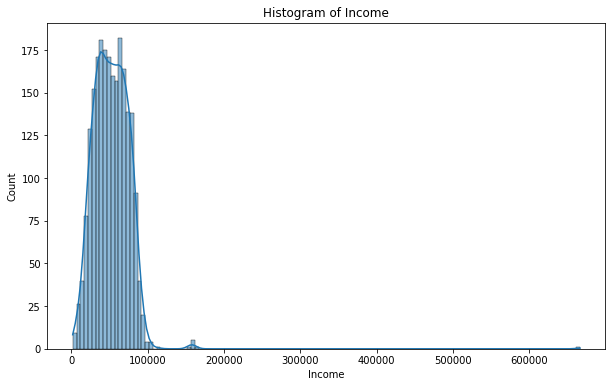

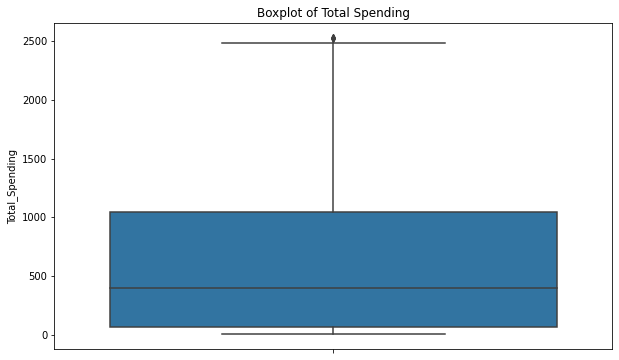

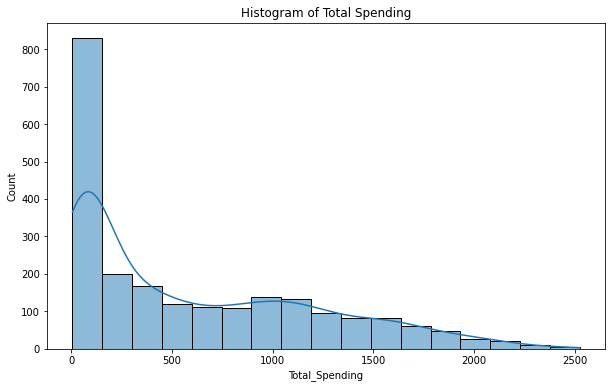

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot of Income
plt.figure(figsize=(10, 6))
sns.boxplot(y='Income', data=df)
plt.title('Boxplot of Income')
plt.show()

# Histogram of Income
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], kde=True)
plt.title('Histogram of Income')
plt.show()

# Box plot of Total Spending
plt.figure(figsize=(10, 6))
sns.boxplot(y='Total_Spending', data=df)
plt.title('Boxplot of Total Spending')
plt.show()

# Histogram of Total Spending
plt.figure(figsize=(10, 6))
sns.histplot(df['Total_Spending'], kde=True)
plt.title('Histogram of Total Spending')
plt.show()

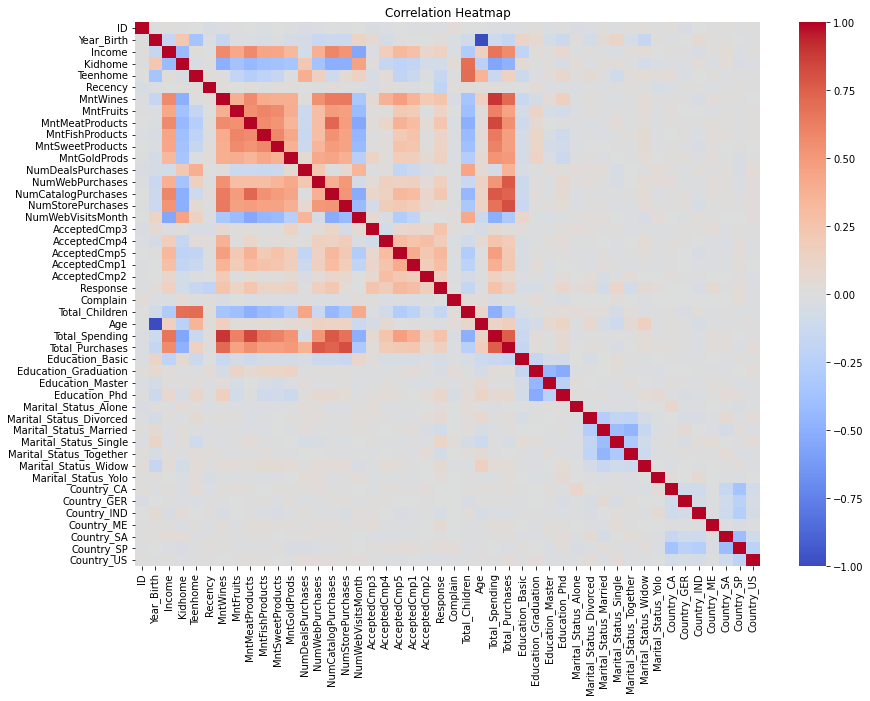

In [13]:
# One-hot encoding
df_encoded = pd.get_dummies(df, columns=['Education', 'Marital_Status', 'Country'], drop_first=True)
df_encoded.head()

# Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df_encoded.corr(numeric_only=True), annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [14]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Income'] >= lower_bound) & (df['Income'] <= upper_bound)]

In [15]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df['Education_Encoded'] = encoder.fit_transform(df[['Education']])

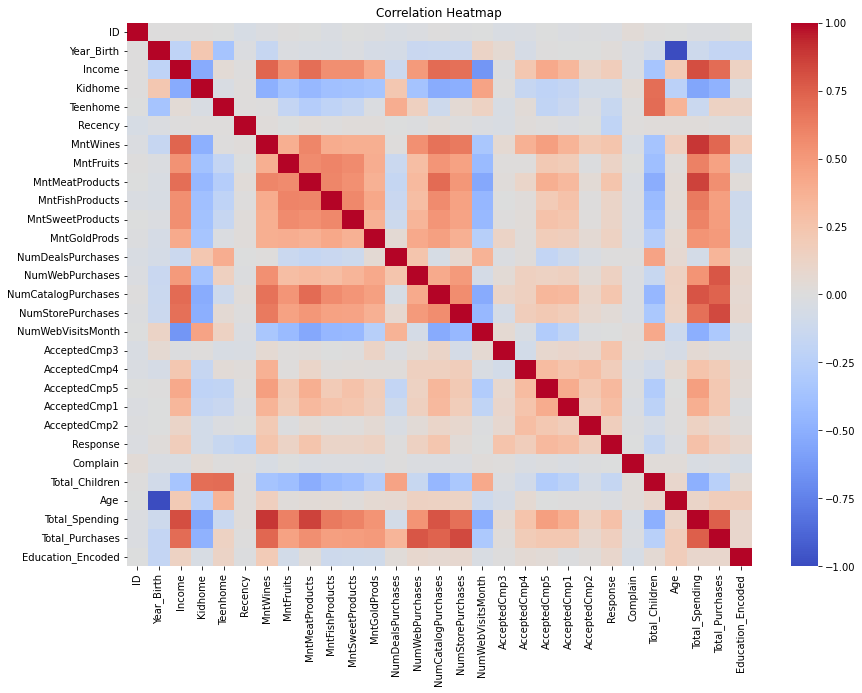

In [16]:
# df = pd.get_dummies(df, columns=['Marital_Status'], drop_first=True)

df.head()

# Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

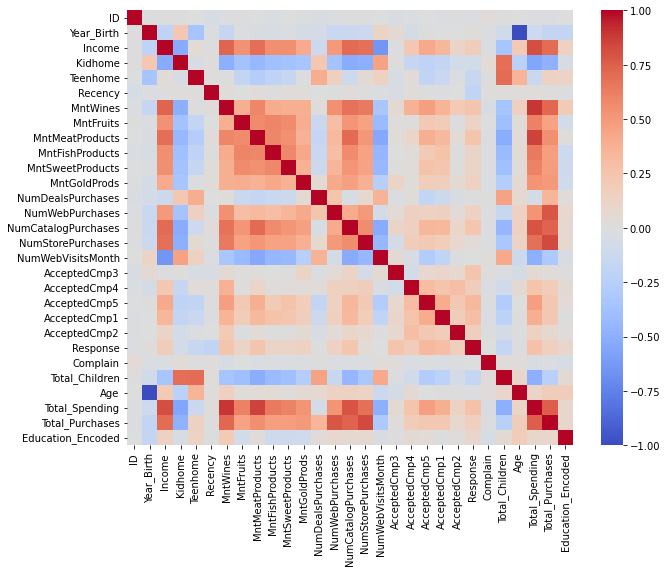

In [17]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='coolwarm')
plt.show()

In [18]:
from scipy.stats import ttest_ind
older_customers = df[df['Age'] > 50]['NumStorePurchases']
younger_customers = df[df['Age'] <= 50]['NumStorePurchases']
t_stat, p_value = ttest_ind(older_customers, younger_customers)
print(p_value)

5.574206909380963e-06


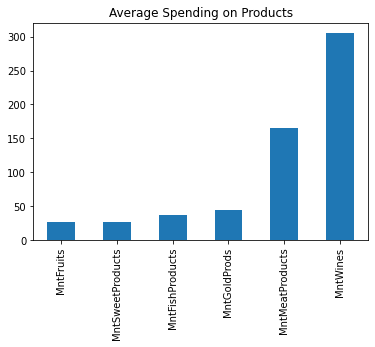

In [19]:
df[product_cols].mean().sort_values().plot(kind='bar')
plt.title('Average Spending on Products')
plt.show()

<AxesSubplot: xlabel='Age', ylabel='Response'>

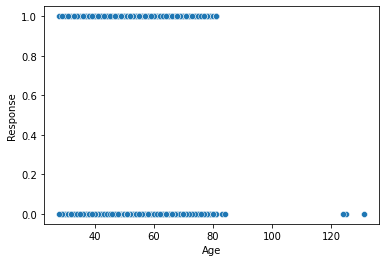

In [20]:
sns.scatterplot(x='Age', y='Response', data=df)

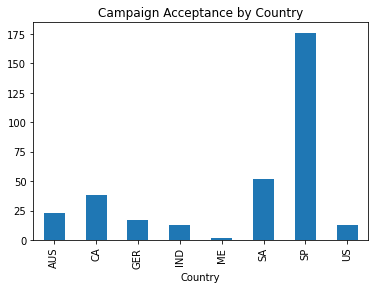

In [21]:
df.groupby('Country')['Response'].sum().plot(kind='bar')
plt.title('Campaign Acceptance by Country')
plt.show()

<AxesSubplot: xlabel='Total_Children', ylabel='Total_Spending'>

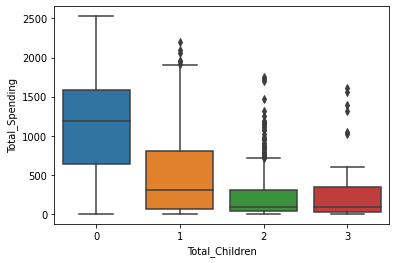

In [22]:
sns.boxplot(x='Total_Children', y='Total_Spending', data=df)

Text(0.5, 1.0, 'Complaints by Education')

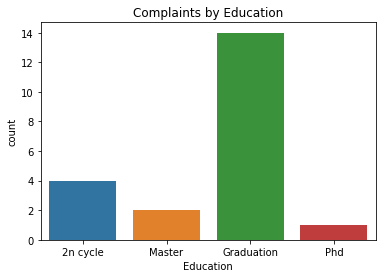

In [23]:
df_complaints = df[df['Complain'] == 1]
sns.countplot(x='Education', data=df_complaints)
plt.title('Complaints by Education')